In [1]:
# import libraries for data preprocessing
import numpy as np                                                              # to work with dataframes and other data
import pandas as pd                                                             # to work with dataframes
from sklearn.feature_extraction.text import CountVectorizer                     # for string vectorization
from sklearn.preprocessing import OneHotEncoder                                 # for categorical vectorization
from sklearn.preprocessing import MinMaxScaler                                  # to normalise numeric data
from sklearn.model_selection import train_test_split                            # for data split
from sklearn.decomposition import PCA                                           # for data dimension reduction in order to plot decision boundary

# to plot figures
import matplotlib.pyplot as plt

# load data
movies = pd.read_csv('./data/filmtv_movies - ENG.csv')

In [2]:
# check data structure
movies

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40298,221040,Louis C.K.: Sorry,2021,Comedy,63,United States,Louis C.K.,Louis C.K.,6.0,NaN,6.0,1,Show recorded at the Madison Square Garden in ...,NaN,0,0,0,0,0
40299,221041,"Me, Natalie",1969,Comedy,111,United States,Fred Coe,"Patty Duke, James Farentino, Martin Balsam, Al...",8.0,NaN,8.0,1,"Brooklyn. Natalie Miller (Patty Duke), a girl ...",NaN,0,0,0,0,0
40300,221059,Il nero,1967,Drama,107,Italy,Giovanni Vento,"Joy Nwosu, Alessandra Dal Sasso, Andrea Checch...",6.0,6.00,NaN,1,"The hopes, the illusions, the daily vicissitud...",NaN,0,0,0,0,0
40301,221061,Operatsiya 'Y' i drugie priklyucheniya Shurika,1965,Comedy,95,Soviet Union,Leonid Gaidai,"Aleksandr Demyanenko, Mikhail Pugovkin, Alekse...",6.0,6.00,NaN,1,"Three episodes starring the excerpt Shurik, a ...",NaN,0,0,0,0,0


In [3]:
# another way to look on data
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40303 entries, 0 to 40302
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   filmtv_id     40303 non-null  int64  
 1   title         40303 non-null  object 
 2   year          40303 non-null  int64  
 3   genre         40208 non-null  object 
 4   duration      40303 non-null  int64  
 5   country       40292 non-null  object 
 6   directors     40270 non-null  object 
 7   actors        38251 non-null  object 
 8   avg_vote      40303 non-null  float64
 9   critics_vote  35703 non-null  float64
 10  public_vote   39829 non-null  float64
 11  total_votes   40303 non-null  int64  
 12  description   38848 non-null  object 
 13  notes         18456 non-null  object 
 14  humor         40303 non-null  int64  
 15  rhythm        40303 non-null  int64  
 16  effort        40303 non-null  int64  
 17  tension       40303 non-null  int64  
 18  erotism       40303 non-nu

In [4]:
# Choose all columns with relevant features
movie_data = movies[['avg_vote','genre','directors','actors','duration', 'humor', 'rhythm', 'effort', 'tension', 'erotism']]

# delete movies variable as we do not need it anymore
del movies

In [5]:
# Check changes
movie_data.head(5)

,avg_vote,genre,directors,actors,duration,humor,rhythm,effort,tension,erotism
0,7.7,Animation,"David Detiege, Art Davis, Bill Perez",NaN,76,3,3,0,0,0
1,6.5,Drama,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",98,0,2,0,2,0
2,5.6,Romantic,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",91,1,2,1,0,0
3,7.0,Comedy,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",95,2,2,0,1,2
4,5.9,Comedy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",85,3,1,1,0,0


In [6]:
# Check data for null values
movie_data.isnull().sum()

avg_vote        0
genre          95
directors      33
actors       2052
duration        0
humor           0
rhythm          0
effort          0
tension         0
erotism         0
dtype: int64

In [7]:
# As there are not so many null values and we can not simply generate data for actors/directros/genre fields, we can simply drop these rows from the dataset
movie_data = movie_data.dropna()

In [8]:
# Check data for null values again
movie_data.isnull().sum()

avg_vote     0
genre        0
directors    0
actors       0
duration     0
humor        0
rhythm       0
effort       0
tension      0
erotism      0
dtype: int64

In [9]:
# Check data for duplicates
movie_data.duplicated().sum()

6

In [10]:
# Drop all duplicate values except the first one
movie_data.drop_duplicates(keep = 'first', inplace = True)

In [11]:
# Check for duplicates again
movie_data.duplicated().sum()

0

### Treat the outliers in duration column

<AxesSubplot: >

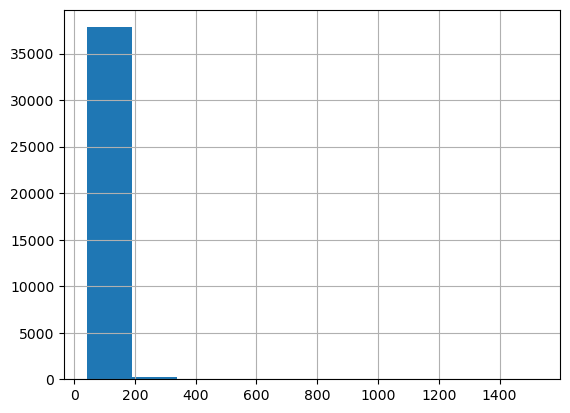

In [12]:
# duration plot, as we can see it is not distributed evenly due to some huge numbers, therefore I decided to cap large numbers at 240 (it is 4 hours)
movie_data['duration'].hist()

<AxesSubplot: >

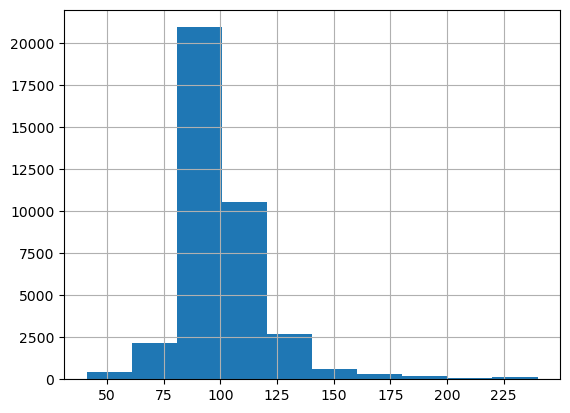

In [13]:
#Function to cap duration large values at 240
def duration_cap(duration):
    if duration > 240.0:
        return 240.0
    else:
        return duration


movie_data['duration'] = movie_data['duration'].apply(duration_cap)

# as we can see now our data is distributed much better
movie_data['duration'].hist()

In [14]:
# Look on actors column structure
movie_data.iloc[0].actors

'Kim Rossi Stuart, Simona Cavallari, Ennio Fantastichini, Orso Maria Guerrini, Silli Togni, Maria Pia Calzone, Luciano Curreli, Francesco Maria Dominedò'

In [15]:
#Function that will take first 3 actors names from actors feature
# and take all spaces between name and spaces for vectorisation purpose
def prepare_actors(string):
    return ' '.join(string.replace(" ", "").split(',')[:3])

#Apply function
movie_data['actors'] = movie_data['actors'].apply(prepare_actors)

# Look on changes in actors column
movie_data.iloc[0].actors

'KimRossiStuart SimonaCavallari EnnioFantastichini'

In [16]:
# Look on directors column structure
movie_data.iloc[:10].directors

1                            Luigi Perelli
2                              Don Chaffey
3                           Barry Levinson
4                           Esodo Pratelli
5     Gianfranco Baldanello, Menahem Golan
6                               Elio Petri
7                       John Frankenheimer
8             Ray Morrison (Angelo Dorigo)
9                              James Foley
10                          Leon Klimovsky
Name: directors, dtype: object

In [17]:
#Function that will prepare director's names for vectarisation
def prepare_directors(string):
    return ' '.join(string.replace(" ", "").split(','))

#Apply function
movie_data['directors'] = movie_data['directors'].apply(prepare_directors)

# Look on changes in directors column
movie_data.iloc[:10].directors

1                          LuigiPerelli
2                            DonChaffey
3                         BarryLevinson
4                         EsodoPratelli
5     GianfrancoBaldanello MenahemGolan
6                             ElioPetri
7                     JohnFrankenheimer
8             RayMorrison(AngeloDorigo)
9                            JamesFoley
10                        LeonKlimovsky
Name: directors, dtype: object

In [18]:
# Vectorise genre column
vectorizer = OneHotEncoder(handle_unknown = 'ignore')
vec_matrix = vectorizer.fit_transform(movie_data["genre"].to_numpy().reshape(-1, 1)) 
vec_array = vec_matrix.toarray()

# make new dataframe out from vectorised data
df = pd.DataFrame(data = vec_array, columns = vectorizer.get_feature_names_out())

# add new columns for each genre
movie_data = pd.concat([movie_data, df], axis = 1, join = "inner")

# drop old genre column
movie_data.drop('genre', inplace = True, axis = 1)

# check new data
movie_data

,avg_vote,directors,actors,duration,humor,rhythm,effort,tension,erotism,x0_Action,...,x0_Noir,x0_Romantic,x0_Short Movie,x0_Sperimental,x0_Sport,x0_Spy,x0_Super-hero,x0_Thriller,x0_War,x0_Western
1,6.5,LuigiPerelli,KimRossiStuart SimonaCavallari EnnioFantastichini,98.0,0,2,0,2,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.6,DonChaffey,MichaelCraig JohnMeillon EvaGriffith,91.0,1,2,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,BarryLevinson,MickeyRourke SteveGuttenberg EllenBarkin,95.0,2,2,0,1,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.9,EsodoPratelli,EduardoDeFilippo PeppinoDeFilippo CleliaMatania,85.0,3,1,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,4.8,GianfrancoBaldanello MenahemGolan,FabioTesti JanetAgren AssafDayan,117.0,1,2,0,2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38127,5.6,ChristosNikou,ArisServetalis SofiaGeorgovassili AnnaKalaitzidou,90.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38128,6.5,Marie-CastilleMention-Schaar,NoémieMerlant Soko VincentDedienne,107.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38129,7.4,MohamedDiab,TaraAbboud SabaMubarak AliSuliman,98.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38130,6.9,LeylaBouzid,SamiOutalbali ZbeidaBelhajamor Diong-KébaTacu,102.0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Vectorise actors column
vectorizer = CountVectorizer()
vec_matrix = vectorizer.fit_transform(movie_data["actors"]) 
vec_array = vec_matrix.toarray()

# make new dataframe out from vectorised data
df = pd.DataFrame(data=vec_array,columns = vectorizer.get_feature_names_out())

# add new columns for each actors
movie_data = pd.concat([movie_data, df], axis = 1, join="inner")

# drop old actors column
movie_data.drop('actors', inplace=True, axis=1)

# check new data
movie_data

,avg_vote,directors,duration,humor,rhythm,effort,tension,erotism,x0_Action,x0_Adventure,...,ídamekkínhlynsdóttir,ólafurdarriólafsson,óscarjaenada,óscarnúñez,öykükarayel,ølgaard,úrsulacorberó,úrsulamurayama,þorsteinnbachmann,þrösturleógunnarsson
1,6.5,LuigiPerelli,98.0,0,2,0,2,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5.6,DonChaffey,91.0,1,2,1,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,7.0,BarryLevinson,95.0,2,2,0,1,2,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5.9,EsodoPratelli,85.0,3,1,1,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,4.8,GianfrancoBaldanello MenahemGolan,117.0,1,2,0,2,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36116,4.0,TreyHaley,105.0,0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
36117,8.1,GailHarvey,90.0,0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
36118,6.1,JonathanSobol,98.0,0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
36119,6.5,MichaelHerbig,125.0,0,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Vectorise actors column
vec_matrix = vectorizer.fit_transform(movie_data["directors"]) 
vec_array = vec_matrix.toarray()

# make new dataframe out from vectorised data
df = pd.DataFrame(data=vec_array,columns = vectorizer.get_feature_names_out())

# add new columns for each actors
movie_data = pd.concat([movie_data, df], axis = 1, join="inner")

# delete variables that we will not use further
del df, vec_matrix, vec_array

# drop old actors column
movie_data.drop('directors', inplace=True, axis=1)

# check new data
movie_data

,avg_vote,duration,humor,rhythm,effort,tension,erotism,x0_Action,x0_Adventure,x0_Animation,...,árpádsopsits,ásahelgahjörleifsdóttir,åkesandgren,éléonorefaucher,éricduret,éricfalardeau,érictessier,évagárdos,óskarjónasson,özcanalper
1,6.5,98.0,0,2,0,2,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,5.6,91.0,1,2,1,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,7.0,95.0,2,2,0,1,2,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,5.9,85.0,3,1,1,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,4.8,117.0,1,2,0,2,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34278,6.3,99.0,0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
34279,5.8,118.0,0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
34280,1.0,89.0,0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
34281,4.8,83.0,0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Normalise data in range 0 to 1 in duration column using MinMaxScaler() from sklearn
scaler = MinMaxScaler()
scaler.fit(movie_data[['duration']])
scaled = scaler.fit_transform(movie_data[['duration']])

# Make new dataframe with normalises duration column
scaled_df = pd.DataFrame(scaled, columns=movie_data[['duration']].columns)

In [22]:
# drop old duration column
movie_data.drop(['duration'], inplace=True, axis=1)

In [23]:
# add new duration column
movie_data = pd.concat([movie_data, scaled_df], axis = 1, join = "inner")

# check changes
movie_data

,avg_vote,humor,rhythm,effort,tension,erotism,x0_Action,x0_Adventure,x0_Animation,x0_Biblical,...,ásahelgahjörleifsdóttir,åkesandgren,éléonorefaucher,éricduret,éricfalardeau,érictessier,évagárdos,óskarjónasson,özcanalper,duration
1,6.5,0,2,0,2,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.251256
2,5.6,1,2,1,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.271357
3,7.0,2,2,0,1,2,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.221106
4,5.9,3,1,1,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.381910
5,4.8,1,2,0,2,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.261307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32572,2.7,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.281407
32575,5.5,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.386935
32576,3.3,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.241206
32577,6.5,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.211055


In [24]:
# delete variables that we will not use further
del scaled, scaled_df, scaler, vectorizer

In [25]:
# Function to find wich if two classes (recommend or not) should be asigned to the film
def vote_to_class(avg_vote):
    if avg_vote < 6.5:
        return 0
    else:
        return 1

# Apply that function and rename avg_vote column to recommend
movie_data['avg_vote'] = movie_data['avg_vote'].apply(vote_to_class)
movie_data.rename({'avg_vote': 'recommend'}, axis=1, inplace=True)

# check changes
movie_data

,recommend,humor,rhythm,effort,tension,erotism,x0_Action,x0_Adventure,x0_Animation,x0_Biblical,...,ásahelgahjörleifsdóttir,åkesandgren,éléonorefaucher,éricduret,éricfalardeau,érictessier,évagárdos,óskarjónasson,özcanalper,duration
1,1,0,2,0,2,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.251256
2,0,1,2,1,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.271357
3,1,2,2,0,1,2,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.221106
4,0,3,1,1,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.381910
5,0,1,2,0,2,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.261307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32572,0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.281407
32575,0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.386935
32576,0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.241206
32577,1,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.211055


In [26]:
# find and delete all duplicated columns
movie_data = movie_data.loc[:, ~movie_data.columns.duplicated()]

# check changes
movie_data

,recommend,humor,rhythm,effort,tension,erotism,x0_Action,x0_Adventure,x0_Animation,x0_Biblical,...,ásahelgahjörleifsdóttir,åkesandgren,éléonorefaucher,éricduret,éricfalardeau,érictessier,évagárdos,óskarjónasson,özcanalper,duration
1,1,0,2,0,2,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.251256
2,0,1,2,1,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.271357
3,1,2,2,0,1,2,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.221106
4,0,3,1,1,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.381910
5,0,1,2,0,2,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.261307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32572,0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.281407
32575,0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.386935
32576,0,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.241206
32577,1,0,0,0,0,0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.211055


In [27]:
# Define algorithm_performance function in order to calcualte accuracy, recall, precision, F1_rate
def algorithm_performance (prediction_labels, actual_labels):

    # Define variables to store numbers of confusion matrix
    # true negatives (true No), true positives (true Yes), false negatives (false No) and false positives (false Yes)
    TN, FN, TP, FP = 0, 0, 0, 0

    # Count all confusion matrix values by comparing predicted and real labels
    for i in range(0, len(prediction_labels)):
        if (actual_labels[i] == 0 and prediction_labels[i] == 0):
            TN += 1
        elif (actual_labels[i] == 0 and prediction_labels[i] == 1):
            FN += 1
        elif (actual_labels[i] == 1 and prediction_labels[i] == 1):
            TP += 1
        elif (actual_labels[i] == 1 and prediction_labels[i] == 0):
            FP += 1

    # Check if there are any zeros, make them equal to 1 to avoid division by 0
    if TN == 0: TN = 1
    if FN == 0: FN = 1
    if TP == 0: TP = 1
    if FP == 0: FP = 1

    # Calculate the accuracy
    accuracy = (TP + TN) / (TP + FP + FN + TN)

    # Calculate the recall
    recall = TP / (TP + FN)

    # Calculate the precision
    precision = TP / (TP + FP)

    # Calculate the F1 rate
    F1_rate = 2 / (1 / precision + 1 / recall)

    # return accuracy, recall, precision and F1 rate
    return [accuracy, recall, precision, F1_rate]

In [28]:
# Define grid_search function to find besthyperparameters for models
def grid_search(model_name, hyperparameters_0, hyperparameters_1, data):
    # split train data to train and validation sets
    train_set, validation_set = train_test_split(data, test_size=0.25, random_state=42)

    # separate train labels and features and transform them to numpy array
    train_labels = train_set['recommend'].to_numpy()
    train_set = train_set.drop('recommend', axis = 1).to_numpy()

    # separate validation_set labels and features and transform them to numpy array
    validation_labels = validation_set['recommend'].to_numpy()
    validation_set = validation_set.drop('recommend', axis = 1).to_numpy()

    # define variable to store all results
    results = []

    # define variables to store best accuracy and beast hyperparameters
    best_accuracy = 0
    best_hyperparameters = [0, 0]

    # try all combinations of hyperparameters
    for hyperparameter_0 in hyperparameters_0:
        for hyperparameter_1 in hyperparameters_1:
            # choose what model to train and make prediction based on input model_name variable
            if model_name == 'DT':
                model = DT_algorithm(train_labels, train_set, hyperparameter_0, hyperparameter_1)

            elif model_name == 'LR':
                model = LR_algorithm(train_labels, train_set, hyperparameter_0, hyperparameter_1)

            predictions = model.predict(validation_set)

            result = algorithm_performance(predictions, validation_labels)

            # create result string and store it
            result_string = '////////////////////////////////////////////////////////////' + '\n'

            if model_name == 'DT':
                result_string += 'Hyperparameters: max_depth = ' + str(hyperparameter_0) + ' min_size = ' + str(hyperparameter_1) + '\n'
            elif model_name == 'LR':
                result_string += 'Hyperparameters: learning_rate = ' + str(hyperparameter_0) + ' iterations = ' + str(hyperparameter_1) + '\n'

            result_string += 'Accuracy: ' + str(result[0]) + '\n'
            result_string += 'Recall: ' + str(result[1]) + '\n'
            result_string += 'Precision: ' + str(result[2]) + '\n'
            result_string += 'F1_rate: ' + str(result[3]) + '\n'

            results.append(result_string)

            # if current accuracy is best one, store it in best_accuracy variable and store its hyperparameters
            if best_accuracy < result[0]:
                best_accuracy = result[0]
                best_hyperparameters = [hyperparameter_0, hyperparameter_1]

    # print best results
    if model_name == 'DT':
        print('Best accuracy: ' + str(best_accuracy) + ' Best hyperparameters: max_depth = ' + str(best_hyperparameters[0]) + ' min_size = ' + str(best_hyperparameters[1]))
    elif model_name == 'LR':
        print('Best accuracy: ' + str(best_accuracy) + ' Best hyperparameters: learning_rate = ' + str(best_hyperparameters[0]) + ' iterations = ' + str(best_hyperparameters[1]))

    # return all results as array of strings
    return results

In [29]:
# Define function to plot decision_boundary
def plot_decision_boundary_PCA(model_name, target_labels, data):

    # reduce dimensionality of data to 2D using PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data)

    # fit model on reduced data, choose model based on input model_name variable
    if model_name == 'NB':
        model = NB_algorithm(target_labels, X_pca, alpha = 1)
    elif model_name == 'LR':
        model = LR_algorithm(target_labels, X_pca, learning_rate = 0.1, iterations = 500)
    elif model_name == 'DT':
        model = DT_algorithm(target_labels, X_pca, max_depth = 8, min_size = 10)

    # define meshgrid of points to plot decision boundary
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    # predict class of each point in meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # plot data with decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target_labels, cmap=plt.cm.coolwarm)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Decision boundary on high dimensional data')
    plt.show()

In [30]:
# Naive Bayes algorithm
class NB_algorithm:

    # Prior for film to be recommended
    P_recommend_1 = 0

    # Prior for film to be not recommended
    P_recommend_0 = 0

    # Create empty dataframe to store the Likelihood Table
    likelihood_table = []

    # Train Naive Bayes algorithm with class initialisation
    def __init__(self, labels, data, alpha):
        recommend = []
        # number of films to NOT recommend (0)
        recommend.append(np.count_nonzero(labels == 0)) 

        # number of films to recommend (1)
        recommend.append(np.count_nonzero(labels == 1))

        # total films
        total_films = labels.size

        # prior for film to be not recommended
        self.P_recommend_0 = recommend[0] / total_films

        # prior for film to be recommended
        self.P_recommend_1 = recommend[1] / total_films

        # calculate the Likelihood Table for all features

        # separate data into two numpy arrays by class label, for this first unite labels with data, then split, then delete labels and store final arrays
        # (transpose them, so we can iterate over columns, not rows)
        column_data = np.concatenate((labels.reshape(-1, 1), data), axis=1)
        column_data_0 = np.delete(column_data[column_data[:, 0] == 0], 0, axis=1)
        column_data_1 = np.delete(column_data[column_data[:, 0] == 1], 0, axis=1)
        column_data = [column_data_0.T, column_data_1.T]

        # loop over all feature columns, count rows where recommend class = 0 (first array in column_data) and feature = 1 
        # find likelihood by dividing this number by total number of recommend class = 0, repeat same for recommend class = 1 (second array in column_data), store results in likelihood_table
        # for humor, rhythm, effort, tension and erotism columns loop over all 5 possible values and do the same (as it is ordinal data) (we know that is 5 first columns in our data)
        # for duration do the same, but as it is numerical data, split it into few categories and find likelihood for each of them (we know that it is last column in our data)
        for i in range(2):

            # make temporary array to store all results for each class (0 and 1) and them append them to likelihood_table
            part_of_table = []

            # traverse wtih column_index through each column with values for each class (two arrays, for class 0 and 1, respectively)
            # use column_index variable to trace current column index and if it is related to humor, rhythm, effort, tension and erotism columns or duration column, execute if condition accordingly
            for column_index in range(0, column_data[i].shape[0]):

                # update current column
                column = column_data[i][column_index]

                # if condition for humor, rhythm, effort, tension and erotism columns
                if (column_index < 5):
                    temp_arr = []

                    # count probability for each possible value of column (0, 1, 2, 3, 4, 5)
                    for y in range(6):
                        temp_arr.append((np.count_nonzero(column == y) + alpha) / (recommend[i] + alpha * 2))

                    part_of_table.append(temp_arr)

                # if condition for duration column
                elif (column_index == column_data[i].shape[0] - 1):
                    temp_arr = []

                    # find likelihood for duration "1:40_or_less", meaning it is a subset of rows with duration <= 0.433333 (101 min)
                    temp_arr.append((np.count_nonzero(column < 0.433333) + alpha) / (recommend[i] + alpha * 2))

                    # find likelihood for duration "1:more_than_1", meaning it is a subset of rows with duration > 0.433333 (101 min)
                    temp_arr.append((np.count_nonzero(column >= 0.433333) + alpha) / (recommend[i] + alpha * 2))

                    part_of_table.append(temp_arr)

                # rest columns (they have only 0 and 1 values)
                else:
                    part_of_table.append([(np.count_nonzero(column == 1) + alpha) / (recommend[i] + alpha * 2)])


            # store result for each class in likelihood_table
            self.likelihood_table.append(part_of_table)

    # Method for test data prediction
    def predict(self, data_test):
        # create empty list to store predicted labels from test dataset
        predicted_labels = []

        # traverse through test data rows and multiply all probabilities in each row to find probability of each class
        for row in data_test:

            # as for both classes denominators from basic NB formula are they are same, we can simply ignore that part and compare numerators only
            numerator_1 = self.P_recommend_1    # declare variable to count numerator for posterios probability formula for class 1, update each row iteration
            numerator_0 = self.P_recommend_0    # declare variable to count numerator for posterios probability formula for class 0, update each row iteration           

            # traverse through column values of test data row with column_index
            # use index variable to trace current column index and if it is related to humor, rhythm, effort, tension and erotism columns or duration column, execute if condition accordingly
            for column_index in range(0, row.shape[0]):
                # update current column value
                column_value = row[column_index]

                # if feature exists, find corresponding values for likelihood in class 1, class 0 and (class 1 + class 0) in likelihood_table 
                # and multiply with rest values in denominator and both numerators

                # for humor, rhythm, effort, tension and erotism columns loop over all 5 possible values an find current one
                if (column_index < 5):
                    for i in range(6):
                        if (column_value == i):
                            numerator_1 *= self.likelihood_table[0][column_index][i]
                            numerator_0 *= self.likelihood_table[1][column_index][i]
                            break

                # for duration column find value for particular data split
                elif (column_index == row.shape[0] - 1):
                    if (column_value < 0.433333):
                        numerator_1 *= self.likelihood_table[0][column_index][0]
                        numerator_0 *= self.likelihood_table[1][column_index][0]
                    
                    elif (column_value >= 0.433333):
                        numerator_1 *= self.likelihood_table[0][column_index][1]
                        numerator_0 *= self.likelihood_table[1][column_index][1]

                # for rest values, find if they are have value 1 (meaning current datapoint has this feature) and if so, add that feature's probability
                elif (column_value == 1):
                    numerator_1 *= self.likelihood_table[0][column_index][0]
                    numerator_0 *= self.likelihood_table[1][column_index][0]
        
            # store posterios probability for both classes (no denominator as it is same for both of them)
            posterios_1 = numerator_1
            posterios_0 = numerator_0

            # find which value is greater so we find which class has the highest probability, then store class label with the highest probability
            if (posterios_1 >= posterios_0):
                predicted_labels.append(1)
            else:
                predicted_labels.append(0)

        # return predicted and real labels
        return np.array(predicted_labels)

### Train and test with data split 70 to 30

In [31]:
# Split the data 70 to 30
train_set, test_set = train_test_split(movie_data, test_size=0.3, random_state=42)

# Separate train labels and features and transform them to numpy array
train_labels = train_set['recommend'].to_numpy()
train_set = train_set.drop('recommend', axis = 1).to_numpy()

# Separate test labels and features and transform them to numpy array
target_labels = test_set['recommend'].to_numpy()
test_set = test_set.drop('recommend', axis = 1).to_numpy()

In [32]:
# Train algorithm for 70% of training set
NB_70 = NB_algorithm(train_labels, train_set, alpha = 1)

In [33]:
# Predict labels for test set
predictions_70 = NB_70.predict(test_set)

In [34]:
# Count algorithm performance
NB_results_70 = algorithm_performance(predictions_70, target_labels) 

In [35]:
# Display metrics
print('Accuracy: ' + str(NB_results_70[0]))
print('Recall: ' + str(NB_results_70[1]))
print('Precision: ' + str(NB_results_70[2]))
print('F1_rate: ' + str(NB_results_70[3]))

Accuracy: 0.5015037593984962
Recall: 0.2446106467223933
Precision: 0.15977011494252874
F1_rate: 0.19329045715278984


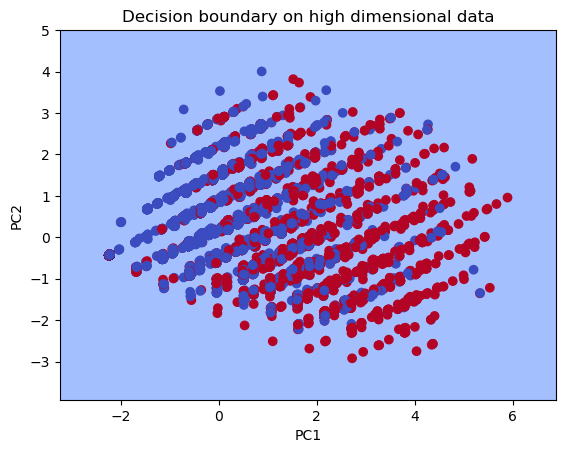

In [36]:
# Plot decision boundary
plot_decision_boundary_PCA('NB', target_labels, test_set)

### Train and test with data split 60 to 40

In [37]:
# Split the data 60 to 40
train_set, test_set = train_test_split(movie_data, test_size=0.4, random_state=42)

# Separate train labels and features and transform them to numpy array
train_labels = train_set['recommend'].to_numpy()
train_set = train_set.drop('recommend', axis = 1).to_numpy()

# Separate test labels and features and transform them to numpy array
target_labels = test_set['recommend'].to_numpy()
test_set = test_set.drop('recommend', axis = 1).to_numpy()

In [38]:
# Train algorithm for 60% of training set
NB_60 = NB_algorithm(train_labels, train_set, alpha = 1)

In [39]:
# Predict labels for test set
predictions_60 = NB_60.predict(test_set)

In [40]:
# Count algorithm performance
NB_results_60 = algorithm_performance(predictions_60, target_labels)

In [41]:
# Display metrics
print('Accuracy: ' + str(NB_results_60[0]))
print('Recall: ' + str(NB_results_60[1]))
print('Precision: ' + str(NB_results_60[2]))
print('F1_rate: ' + str(NB_results_60[3]))

Accuracy: 0.42911229257290157
Recall: 0.16391184573002754
Precision: 0.12803959543791693
F1_rate: 0.14377189803068743


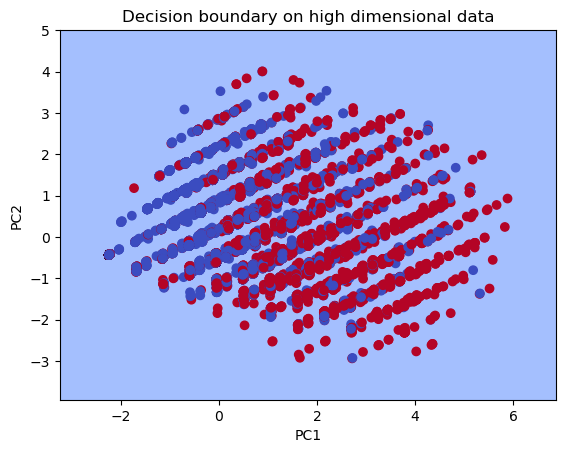

In [42]:
# Plot decision boundary
plot_decision_boundary_PCA('NB', target_labels, test_set)

### Train and test with data split 50 to 50

In [43]:
# Split the data 50 to 50
train_set, test_set = train_test_split(movie_data, test_size=0.5, random_state=42)

# Separate train labels and features and transform them to numpy array
train_labels = train_set['recommend'].to_numpy()
train_set = train_set.drop('recommend', axis = 1).to_numpy()

# Separate test labels and features and transform them to numpy array
target_labels = test_set['recommend'].to_numpy()
test_set = test_set.drop('recommend', axis = 1).to_numpy()

In [44]:
# Train algorithm for 50% of training set
NB_50 = NB_algorithm(train_labels, train_set, alpha = 1)

In [45]:
# Predict labels for test set
predictions_50 = NB_50.predict(test_set)

In [46]:
# Count algorithm performance
NB_results_50 = algorithm_performance(predictions_50, target_labels)

In [47]:
# Display metrics
print('Accuracy: ' + str(NB_results_50[0]))
print('Recall: ' + str(NB_results_50[1]))
print('Precision: ' + str(NB_results_50[2]))
print('F1_rate: ' + str(NB_results_50[3]))

Accuracy: 0.38512599084874655
Recall: 0.12840774397471355
Precision: 0.1124762069562208
F1_rate: 0.1199151369799834


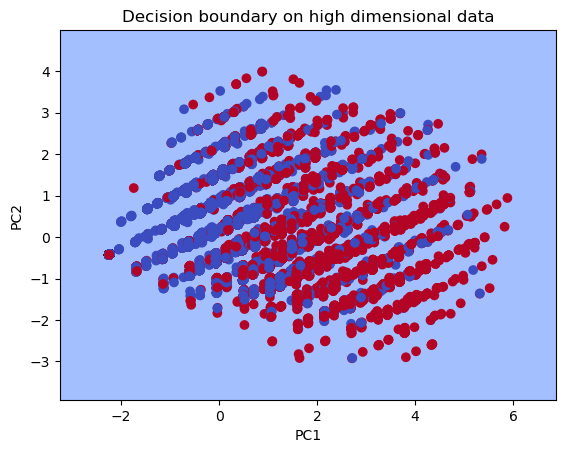

In [48]:
# Plot decision boundary
plot_decision_boundary_PCA('NB', target_labels, test_set)

# Logistic Regression

In [49]:
# logistic regression class
class LR_algorithm:
    
    # Define weights and bias
    weights = 0
    bias = 0

    # Define loss variable to store loss value for each iteration
    loss = []

    # Train LR with class initialisation
    def __init__(self, labels, features, learning_rate, iterations):

        # init temp weights, bias and loss
        weights = np.zeros(features.shape[1])
        bias = 0
        loss = []

        # find size of the input data
        size = features.shape[0]

        # train LR with train data
        for i in range(iterations):
            sigma = self.sigmoid(np.dot(features, weights) + bias)
            loss_value = -1 / size * np.sum(labels * np.log(sigma)) + (1 - labels) * np.log(1 - sigma)
            dW = 1 / size * np.dot(features.T, (sigma - labels))
            db = 1 / size * np.sum(sigma - labels)
            weights -= learning_rate * dW
            bias -= learning_rate * db 

            # ыave current loss value
            loss.append(loss_value)
        
        # store end result for weights, bias and loss
        self.weights = weights
        self.bias = bias
        self.loss = loss
    
    # Define sigmoid function
    @staticmethod
    def sigmoid(input):    
        output = 1 / (1 + np.exp(-input))
        return output
    
    # Define prediction function
    def predict(self, test_data):
        # create array for predisctions
        predicted_labels = []

        # predict labels based on trained weights and bias
        predicted_labels = self.sigmoid(np.dot(test_data, self.weights) + self.bias)

        # transfrom result into labels based on its values, if smaller than 0.5, then it is 0, else 1
        for i in range(len(predicted_labels)):
            predicted_labels[i] = 1 if predicted_labels[i] >= 0.5 else 0
        
        # return predicted and real labels
        return np.array(predicted_labels)


### Train and test with data split 70 to 30

In [50]:
# Split the data 70 to 30
train_set, test_set = train_test_split(movie_data, test_size=0.3, random_state=42)

# Save copy of test data for grid search
grid_search_data = train_set.copy()

# Separate train labels and features and transform them to numpy array
train_labels = train_set['recommend'].to_numpy()
train_set = train_set.drop('recommend', axis = 1).to_numpy()

# Separate test labels and features and transform them to numpy array
target_labels = test_set['recommend'].to_numpy()
test_set = test_set.drop('recommend', axis = 1).to_numpy()

### Find best hyperparameters

In [51]:
# Make a grid search to find best hyperparameters
grid_search_results = grid_search('LR', [0.001, 0.01, 0.1, 1], [100, 300, 500], grid_search_data)

Best accuracy: 0.7175474129994476 Best hyperparameters: learning_rate = 0.1 iterations = 500


In [52]:
# See all results
for result in grid_search_results:
    print(result)

////////////////////////////////////////////////////////////
Hyperparameters: learning_rate = 0.001 iterations = 100
Accuracy: 0.6385564352789541
Recall: 0.75
Precision: 0.03870967741935484
F1_rate: 0.0736196319018405

////////////////////////////////////////////////////////////
Hyperparameters: learning_rate = 0.001 iterations = 300
Accuracy: 0.6466580740195176
Recall: 0.8
Precision: 0.06352357320099256
F1_rate: 0.11770114942528735

////////////////////////////////////////////////////////////
Hyperparameters: learning_rate = 0.001 iterations = 500
Accuracy: 0.6641502485730069
Recall: 0.7720797720797721
Precision: 0.1344913151364764
F1_rate: 0.2290786136939983

////////////////////////////////////////////////////////////
Hyperparameters: learning_rate = 0.01 iterations = 100
Accuracy: 0.6829313201988584
Recall: 0.7478849407783418
Precision: 0.21935483870967742
F1_rate: 0.33921719109746734

////////////////////////////////////////////////////////////
Hyperparameters: learning_rate = 0.0

In [53]:
# Train algorithm for 70% of training set
LR_70 = LR_algorithm(train_labels, train_set, learning_rate = 0.1, iterations = 500)

In [54]:
# Predict labels for test set
predictions_70 = LR_70.predict(test_set)

In [55]:
# Count algorithm performance
LR_results_70 = algorithm_performance(predictions_70, target_labels)

In [56]:
# Display metrics
print('Accuracy: ' + str(LR_results_70[0]))
print('Recall: ' + str(LR_results_70[1]))
print('Precision: ' + str(LR_results_70[2]))
print('F1_rate: ' + str(LR_results_70[3]))

Accuracy: 0.7123523093447905
Recall: 0.6826047358834244
Precision: 0.4307471264367816
F1_rate: 0.5281888653981677


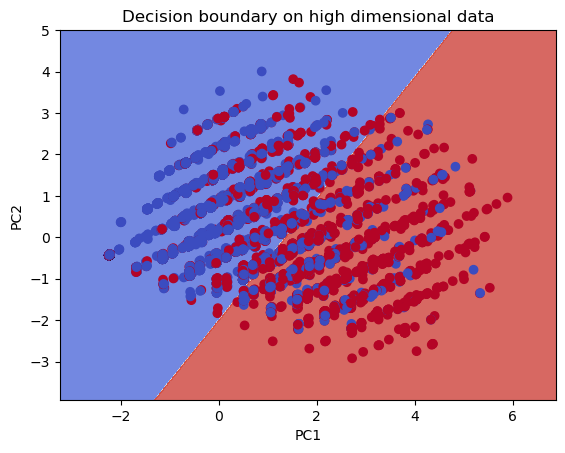

In [57]:
# Plot decision boundary
plot_decision_boundary_PCA('LR', target_labels, test_set)

### Train and test with data split 60 to 40

In [58]:
# Split the data 60 to 40
train_set, test_set = train_test_split(movie_data, test_size=0.4, random_state=42)

# Separate train labels and features and transform them to numpy array
train_labels = train_set['recommend'].to_numpy()
train_set = train_set.drop('recommend', axis = 1).to_numpy()

# Separate test labels and features and transform them to numpy array
target_labels = test_set['recommend'].to_numpy()
test_set = test_set.drop('recommend', axis = 1).to_numpy()

In [59]:
# Train algorithm for 60% of training set
LR_60 = LR_algorithm(train_labels, train_set, learning_rate = 0.1, iterations = 500)

In [60]:
# Predict labels for test set
predictions_60 = LR_60.predict(test_set)

In [61]:
# Count algorithm performance
LR_results_60 = algorithm_performance(predictions_60, target_labels)

In [62]:
# Display metrics
print('Accuracy: ' + str(LR_results_60[0]))
print('Recall: ' + str(LR_results_60[1]))
print('Precision: ' + str(LR_results_60[2]))
print('F1_rate: ' + str(LR_results_60[3]))

Accuracy: 0.7114548090865153
Recall: 0.6800811633412243
Precision: 0.4327523133204218
F1_rate: 0.5289321409784324


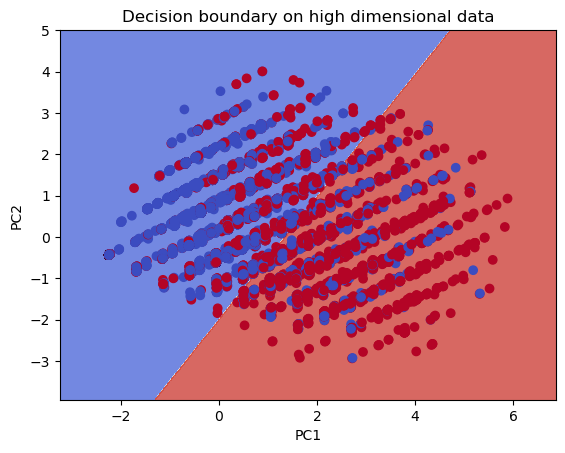

In [63]:
# Plot decision boundary
plot_decision_boundary_PCA('LR', target_labels, test_set)

### Train and test with data split 50 to 50

In [64]:
# Split the data 50 to 50
train_set, test_set = train_test_split(movie_data, test_size=0.5, random_state=42)

# Separate train labels and features and transform them to numpy array
train_labels = train_set['recommend'].to_numpy()
train_set = train_set.drop('recommend', axis = 1).to_numpy()

# Separate test labels and features and transform them to numpy array
target_labels = test_set['recommend'].to_numpy()
test_set = test_set.drop('recommend', axis = 1).to_numpy()

In [65]:
# Train algorithm for 50% of training set
LR_50 = LR_algorithm(train_labels, train_set, learning_rate = 0.1, iterations = 500)

In [66]:
# Predict labels for test set
predictions_50 = LR_50.predict(test_set)

In [67]:
# Count algorithm performance
LR_results_50 = algorithm_performance(predictions_50, target_labels)

In [68]:
# Display metrics
print('Accuracy: ' + str(LR_results_50[0]))
print('Recall: ' + str(LR_results_50[1]))
print('Precision: ' + str(LR_results_50[2]))
print('F1_rate: ' + str(LR_results_50[3]))

Accuracy: 0.7110266159695817
Recall: 0.6749527154823021
Precision: 0.43225471534867627
F1_rate: 0.5270042194092828


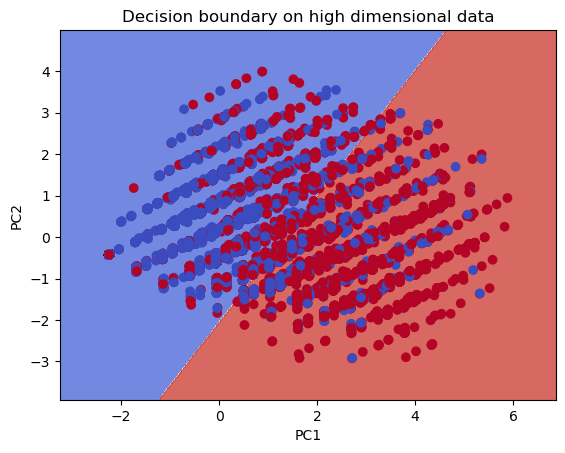

In [69]:
# Plot decision boundary
plot_decision_boundary_PCA('LR', target_labels, test_set)

# Decision Tree

In [70]:
class DT_algorithm:

    # Define variables to store all possible column values and final rules for each node of tree
    values = None
    rules = None

    # Train decision tree algorithm
    def __init__(self, labels, data, max_depth, min_size):
        data = np.concatenate((labels.reshape(-1, 1), data), axis=1)
        self.values = self.calculate_mean_values(data)
        # make sure that rules are an empty array
        self.rules = []
        self.build_tree(data, max_depth, min_size, depth = 0, node_type = 'root')
        

    # Function to find all possible valueas of each feature and return mean values instead (for example [0, 1, 2] will return [0.5, 1.5])
    @staticmethod
    def calculate_mean_values(data):
        # create variables to store column values and mean of these values
        column_values = []
        mean_values = []

        # loop over all columns in dataset dataframe and store all unique values for each column in ascending order
        for i in range(0, len(data[0])):
            column_values.append(np.unique(data[:, i]))
            

        # calculate mean values for all column values (for example [0, 1, 2] will return [0.5, 1.5])
        for values_arr in column_values:
            # check if categorical/text data has more than 1 unique value, if no and array has only 0 or 1, create mean value manualy (0.5, as categorical/text value here is 0 or 1)
            if (len(values_arr) == 1 and (values_arr[0] == 0 or values_arr[0] == 1)):
                mean_values.append([0.5])
            else:
                mean_arr = values_arr[:-1] + values_arr[1:]
                mean_values.append(mean_arr / 2)

        return mean_values

    # Calculate gini impurity of a node
    @staticmethod
    def gini_index(split):
        # create variables to store gini and number of each class instance in split
        gini = 0.0
        class_0 = 0
        class_1 = 0

        # total number of rows in split, if 0, return 0
        n_of_rows = split.shape[0]
        if n_of_rows == 0:
            return gini

        for row in split:
            if row[0] == 0:
                class_0 += 1
            else:
                class_1 += 1
        
        # calculate probability for each class in split
        prob_0 = class_0 / n_of_rows
        prob_1 = class_1 / n_of_rows

        # calculate gini for that split
        gini = 1 - (prob_0 ** 2 + prob_1 ** 2)

        return gini
    
    # Split the array into two subarrays based on a condition
    @staticmethod
    def make_split(column_index, value, data):
        # create condition for data split
        condition = data[:, column_index] < value

        # split the data
        left, right = np.split(data, [np.sum(condition)], axis=0)

        # return two data sets from split
        return left, right

    # Function to find and return best possible split
    def best_split(self, data, column_values):
        # declare variables to store final result and best gini gain varaible in order to find best split
        best_column_index, best_value, best_gini_gain, final_split = 0, 0, -1, []
        # store gini impurity for root node and declare gini gain to store temporary gini impurity that will be compared with best_gini_gain
        gini_gain = 0
        root_gini = self.gini_index(data)

        # loop over each possible mean column value (except for class values), make split based on each value and find best one
        for index in range(1, len(column_values)):
            for value in column_values[index]:
                split = self.make_split(index, value, data)

                # calculate gini index for both parts of split
                left_gini = self.gini_index(split[0])
                right_gini = self.gini_index(split[1])

                # calculate gini gain by substraction a weighted average of left and right gini index from root gini index, the bigger result, the better split
                gini_gain = root_gini - (left_gini * split[0].shape[0] / data.shape[0] + right_gini * split[1].shape[0] / data.shape[0])

                # check if current gini_gain in the loop is better then best_gini_gain, if so, update best split info and data, and best_gini_gain value 
                # (make index - 1, as we have labels column here, but will not have it in prediction)
                if gini_gain > best_gini_gain:
                    best_column_index, best_value, best_gini_gain, final_split = index - 1, value, gini_gain, split

        return best_column_index, best_value, final_split

    # Define function to build final tree
    def build_tree(self, data, max_depth, min_size, depth, node_type):
        # create variable to store size of the current node
        size = data.shape[0]

        # if there is enough size of data point in current node and it is not final possible tree depth, create new split
        if (depth < max_depth and size >= min_size):
            # find best split
            node = self.best_split(data, self.values)

            # make and store rule for this split
            self.rules.append([node_type, depth, node[0], node[1]])

            # repeat same process for child nodes pf this split
            self.build_tree(node[2][0], max_depth, min_size, depth + 1, node_type = 'l')
            self.build_tree(node[2][1], max_depth, min_size, depth + 1, node_type = 'r')

        # if it is terminal node, find class label with most datapoint in current node and store it in rules array
        # then finish function with void return
        else:
            class_0, class_1 = 0, 0

            for row in data:
                if row[0] == 0:
                    class_0 += 1
                else:
                    class_1 += 1

            if class_0 > class_1:
                self.rules.append([node_type, depth, 0])
            else:
                self.rules.append([node_type, depth, 1])
            
            return

    
    # Define prediction function
    def predict(self, test_data):
        # create array for predictions
        predicted_labels = []

        # loop over each data point in test data and follow rules array
        for row in test_data:
            # make variables to track current tree depth and leaf (right or left)
            cur_depth = 0
            cur_answer = 'start'

            # loop over rules array to follow tree structure
            for rule in self.rules:
                
                # condition for first, "root", node
                if cur_depth == 0:
                    # update cur_depth tracker
                    cur_depth += 1

                    # find out in what side of tree should we move based on condition from rules array
                    # update cur_answer tracker
                    if row[rule[2]] < rule[3]:
                        cur_answer = 'l'
                    else:
                        cur_answer = 'r'

                # condition for rest of nodes, if trakers for depth and leaf match current rule, read that rule
                elif (cur_answer == rule[0] and cur_depth == rule[1]):
                     # update cur_depth tracker
                    cur_depth += 1

                    # check if matched rule is a terminal node or not (terminal nodes have only lengh of 3)
                    # if it is not, folow first close, find out in what side of tree should we move based on condition from rules array
                    # update cur_answer tracker
                    if len(rule) == 4:
                        if row[rule[2]] < rule[3]:
                            cur_answer = 'l'
                        else:
                            cur_answer = 'r'

                    # if it is terminal node, read final class label and store it in predicted_labels array
                    else:
                        predicted_labels.append(rule[2])
                        break
                
                # if there is no math, skip that rule
                else:
                    continue

        # return array with predictions
        return np.array(predicted_labels)




### Train and test with data split 70 to 30

In [71]:
# Split the data 70 to 30
train_set, test_set = train_test_split(movie_data, test_size=0.3, random_state=42)

# Save copy of test data for grid search
grid_search_data = train_set.copy()

# Separate train labels and features and transform them to numpy array
train_labels = train_set['recommend'].to_numpy()
train_set = train_set.drop('recommend', axis = 1).to_numpy()

# Separate test labels and features and transform them to numpy array
target_labels = test_set['recommend'].to_numpy()
test_set = test_set.drop('recommend', axis = 1).to_numpy()

### Find best hyperparameters

In [72]:
# Make a grid search to find best hyperparameters
grid_search_results = grid_search('DT', [3, 5, 8, 10], [5, 10, 20], grid_search_data)

Best accuracy: 0.6296023564064801 Best hyperparameters: max_depth = 8 min_size = 5


In [73]:
# See all results
for result in grid_search_results:
    print(result)

////////////////////////////////////////////////////////////
Hyperparameters: max_depth = 3 min_size = 5
Accuracy: 0.6289342904472667
Recall: 0.5
Precision: 0.000496031746031746
F1_rate: 0.0009910802775024777

////////////////////////////////////////////////////////////
Hyperparameters: max_depth = 3 min_size = 10
Accuracy: 0.6289342904472667
Recall: 0.5
Precision: 0.000496031746031746
F1_rate: 0.0009910802775024777

////////////////////////////////////////////////////////////
Hyperparameters: max_depth = 3 min_size = 20
Accuracy: 0.6289342904472667
Recall: 0.5
Precision: 0.000496031746031746
F1_rate: 0.0009910802775024777

////////////////////////////////////////////////////////////
Hyperparameters: max_depth = 5 min_size = 5
Accuracy: 0.6290500736377025
Recall: 0.5
Precision: 0.0004962779156327543
F1_rate: 0.0009915716410510659

////////////////////////////////////////////////////////////
Hyperparameters: max_depth = 5 min_size = 10
Accuracy: 0.6290500736377025
Recall: 0.5
Precision:

In [74]:
# Train algorithm for 70% of training set
DT_70 = DT_algorithm(train_labels, train_set, max_depth = 8, min_size = 10)

In [75]:
# Predict labels for test set
predictions_70 = DT_70.predict(test_set)

In [76]:
# Count algorithm performance
DT_results_70 = algorithm_performance(predictions_70, target_labels)

In [77]:
# Display metrics
print('Accuracy: ' + str(DT_results_70[0]))
print('Recall: ' + str(DT_results_70[1]))
print('Precision: ' + str(DT_results_70[2]))
print('F1_rate: ' + str(DT_results_70[3]))

Accuracy: 0.6259935553168636
Recall: 0.4642857142857143
Precision: 0.003735632183908046
F1_rate: 0.00741163055872292


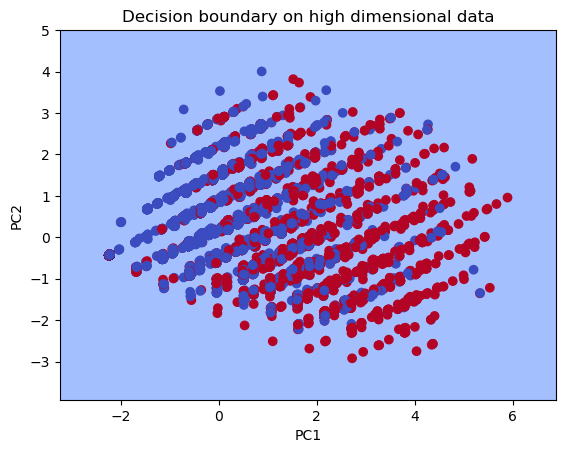

In [78]:
# Plot decision boundary
plot_decision_boundary_PCA('DT', target_labels, test_set)

### Train and test with data split 60 to 40

In [79]:
# Split the data 60 to 40
train_set, test_set = train_test_split(movie_data, test_size=0.4, random_state=42)

# Separate train labels and features and transform them to numpy array
train_labels = train_set['recommend'].to_numpy()
train_set = train_set.drop('recommend', axis = 1).to_numpy()

# Separate test labels and features and transform them to numpy array
target_labels = test_set['recommend'].to_numpy()
test_set = test_set.drop('recommend', axis = 1).to_numpy()

In [80]:
# Train algorithm for 60% of training set
DT_60 = DT_algorithm(train_labels, train_set, max_depth = 8, min_size = 10)

In [81]:
# Predict labels for test set
predictions_60 = DT_60.predict(test_set)

In [82]:
# Count algorithm performance
DT_results_60 = algorithm_performance(predictions_60, target_labels)

In [83]:
# Display metrics
print('Accuracy: ' + str(DT_results_60[0]))
print('Recall: ' + str(DT_results_60[1]))
print('Precision: ' + str(DT_results_60[2]))
print('F1_rate: ' + str(DT_results_60[3]))

Accuracy: 0.6240534879974222
Recall: 0.2826086956521739
Precision: 0.002797503765870454
F1_rate: 0.00554016620498615


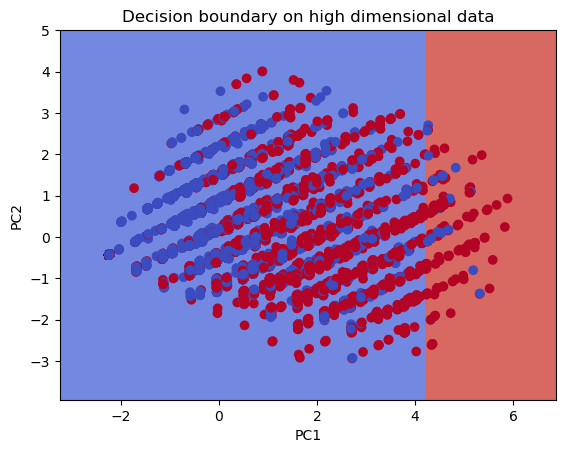

In [84]:
# Plot decision boundary
plot_decision_boundary_PCA('DT', target_labels, test_set)

### Train and test with data split 50 to 50

In [85]:
# Split the data 50 to 50
train_set, test_set = train_test_split(movie_data, test_size=0.5, random_state=42)

# Separate train labels and features and transform them to numpy array
train_labels = train_set['recommend'].to_numpy()
train_set = train_set.drop('recommend', axis = 1).to_numpy()

# Separate test labels and features and transform them to numpy array
target_labels = test_set['recommend'].to_numpy()
test_set = test_set.drop('recommend', axis = 1).to_numpy()

In [86]:
# Train algorithm for 50% of training set
DT_50 = DT_algorithm(train_labels, train_set, max_depth = 8, min_size = 10)

In [87]:
# Predict labels for test set
predictions_50 = DT_50.predict(test_set)

In [88]:
# Count algorithm performance
DT_results_50 = algorithm_performance(predictions_50, target_labels)

In [89]:
# Display metrics
print('Accuracy: ' + str(DT_results_50[0]))
print('Recall: ' + str(DT_results_50[1]))
print('Precision: ' + str(DT_results_50[2]))
print('F1_rate: ' + str(DT_results_50[3]))

Accuracy: 0.6287942256879552
Recall: 0.5871559633027523
Precision: 0.011074580377227894
F1_rate: 0.021739130434782608


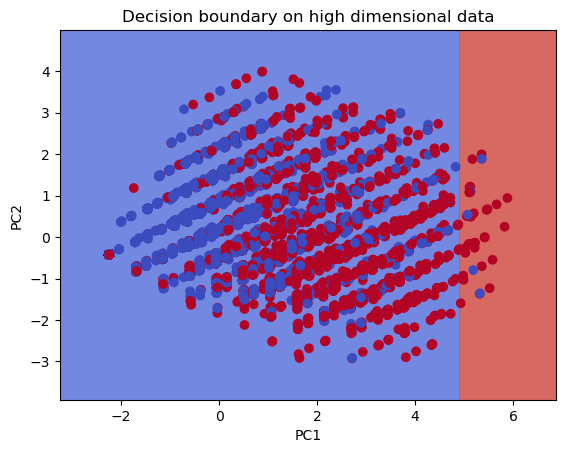

In [90]:
# Plot decision boundary
plot_decision_boundary_PCA('DT', target_labels, test_set)